# **Introduction**

The California dataset provided in this project aims to provide insights into the California housing market by analyzing various features such as median income, housing median age, median house values, and ocean proximity.

In this project, we will explore the dataset to answer questions related to the distribution of data, relationship between features, handling of missing data, and creation of new features. We will also write a user-defined function to calculate the median value of the dataset.

In [4]:
#Importing required Libraries

import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import seaborn as sns

In [6]:
 # loading Data
housing = pd.read_excel('C:/Users/Sanjay/Documents/GitHub/California-Housing-Dataset-Analysis/data/housing.xlsx')  

housing.head(6)         #readind data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY


1.   **longitude:** A measure of how far west a house is; a higher value is farther west
2.   **latitude:** A measure of how far north a house is; a higher value is farther north
3.   **housingMedianAge:** Median age of a house within a block; a lower number is a newer building
4.   **totalRooms:** Total number of rooms within a block
5.   **totalBedrooms:** Total number of bedrooms within a block
6.   **population:** Total number of people residing within a block
7.   **households:** Total number of households, a group of people residing within a home unit, for a block
8.   **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.   **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
10.   **oceanProximity:** Location of the house w.r.t ocean/sea


In [7]:
 housing.info()      #Geting data information - columns , total entries , datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In data **total entries are 20640** and **all are numerical data except 'ocean_proximity' column**. In **column 'total_bedrooms'** entries are 20433(**missing values are 207**)

In [8]:
housing[housing.isnull().any(axis=1)]        # Data which have NaN values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [9]:
housing['ocean_proximity'].value_counts()       # getting information for column "ocean_proximity" all attributes

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()     # Getting data basic overview

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


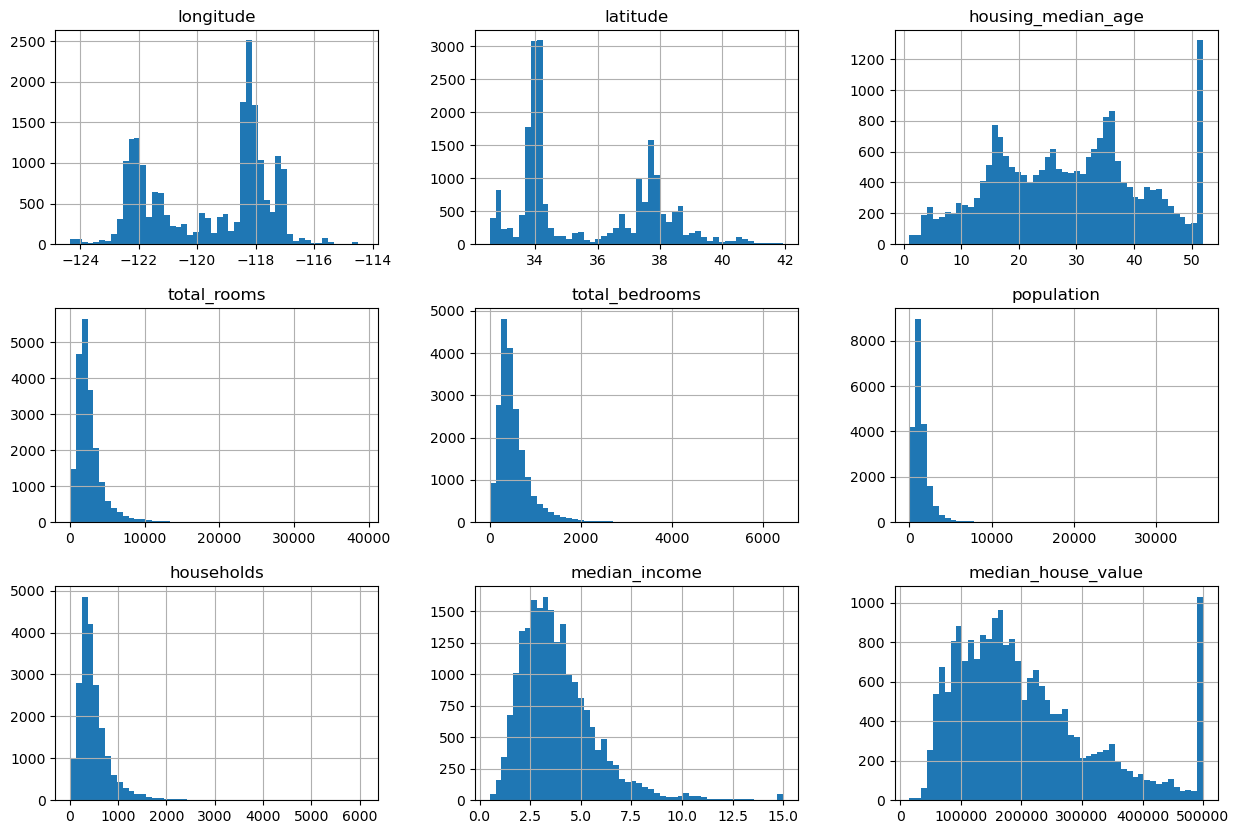

In [11]:
housing.hist(bins = 50 ,figsize=(15,10))      #ploting histogram for data frame to known data distribution
plt.show()

On first impression,We can see **some Outerlier**(inconsistence with data set) group are present in data;( **'housing_median_age' & 'median_house_value'** )